# Assignment 1 - CSIC 351
## Mike Cruickshank (10130161)
## January 21st, 2019

## Problem 1

### Import and Pre-Processing of Data

In [199]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('assignment1-data.csv')


In [200]:
df = df.drop('Subject', axis=1)
y = df['%Body Fat']
X = df
X = X.drop('%Body Fat', axis=1)
df.head()

,Density,%Body Fat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


The correlation between the attributes is analyzed below using both a correlation heat map and a list of correlation to body fat values.

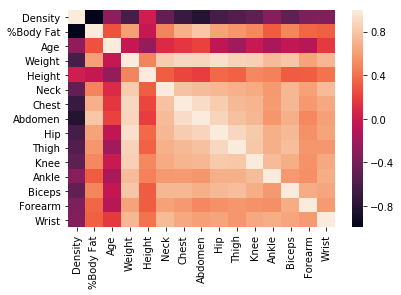

In [201]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [202]:
cor = df.corr()
print("Correlation coefficient with body fat %: \n")
print(cor['%Body Fat'])


Correlation coefficient with body fat %: 

Density     -0.997003
%Body Fat    1.000000
Age          0.276259
Weight       0.610676
Height      -0.025229
Neck         0.486798
Chest        0.699595
Abdomen      0.811838
Hip          0.625624
Thigh        0.567449
Knee         0.502145
Ankle        0.318188
Biceps       0.496172
Forearm      0.359573
Wrist        0.332994
Name: %Body Fat, dtype: float64


As displayed above, it is clear that the attribute with the highest linear correlation coefficient with % Body Fat is Density. Therefore this will be the first variable used to build a model.

#### One Variable Model

Before building a general linear model, the plot of body fat percent and density is constructed to display the strong correlation. 

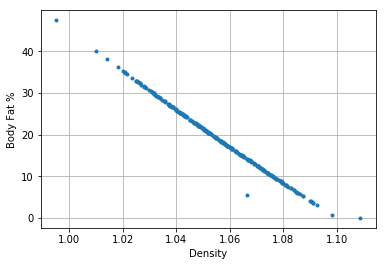

In [203]:
plt.plot(X['Density'],y,'.')
plt.xlabel("Density")
plt.ylabel("Body Fat %")
plt.grid()



Linear model using statsmodels:

In [204]:
import statsmodels.api as sm


In [237]:
x = X['Density']

x_train = sm.add_constant(x)
y_train = y 

model = sm.OLS(y_train, x_train)
model = model.fit()
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              %Body Fat   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 4.119e+04
Date:                Thu, 24 Jan 2019   Prob (F-statistic):          1.16e-277
Time:                        19:53:45   Log-Likelihood:                -245.51
No. Observations:                 250   AIC:                             495.0
Df Residuals:                     248   BIC:                             502.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        487.8412      2.310    211.169      0.000     483.291     492.391
Density     -444.0917      2.188   -202.942      0.000    -448.402    -439.782
==============================================================================
Omnibus:                      409.880   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           190160.225
Skew:                          -7.956   Prob(JB):                         0.00
Kurtosis:                     137.172   Cond. No.                         113.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This linear model has a very good fit, as denoted by an R-squared value of 0.993. The p-value for density is essentially zero which tells us that this is a statistically significant variable. 

#### Two Variable Model

In [238]:
print("Correlation coefficient with body fat % and with density: \n")
print(cor[['%Body Fat','Density']])

Correlation coefficient with body fat % and with density: 

           %Body Fat   Density
Density    -0.997003  1.000000
%Body Fat   1.000000 -0.997003
Age         0.276259 -0.275342
Weight      0.610676 -0.609105
Height     -0.025229  0.018081
Neck        0.486798 -0.483295
Chest       0.699595 -0.696970
Abdomen     0.811838 -0.808699
Hip         0.625624 -0.623181
Thigh       0.567449 -0.566797
Knee        0.502145 -0.505633
Ankle       0.318188 -0.318061
Biceps      0.496172 -0.494681
Forearm     0.359573 -0.359951
Wrist       0.332994 -0.335852


After analyzing the correlation coefficients, I will choose to use abdomen as the second variable for the two-regressor model. After density, it has the second highest correlation with body fat %. 

In general, the correlation between the predictors themselves should be an important consideration when choosing which predictor to add to the model. However, due to the very high correlation between body fat and density, it is difficult to choose a parameter that will result in low multicollinearity as well as make a significant contribution to the performance of the model

In [244]:
x = X[['Density','Abdomen']]

x_train = sm.add_constant(x)

model = sm.OLS(y_train, x_train)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              %Body Fat   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 2.082e+04
Date:                Thu, 24 Jan 2019   Prob (F-statistic):          4.62e-276
Time:                        19:54:19   Log-Likelihood:                -243.63
No. Observations:                 250   AIC:                             493.3
Df Residuals:                     247   BIC:                             503.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        480.5726      4.402    109.167      0.000     471.902     489.243
Density     -438.3003      3.700   -118.469      0.000    -445.587    -431.013
Abdomen        0.0125      0.006      1.936      0.054      -0.000       0.025
==============================================================================
Omnibus:                      406.732   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           184884.000
Skew:                          -7.838   Prob(JB):                         0.00
Kurtosis:                     135.299   Cond. No.                     1.31e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Comparison of the Two Models

The two-regressor model does not perform any better than the one-regressor model, (both have Rsquared values of 0.94). The p-value for abdomen of 0.054 indicates that it is not a statistically significant variable (p-value of 0.054), although is close to the cuttoff of 0.05.

## Problem 2

In [245]:
x = X[['Abdomen','Chest','Thigh','Hip','Knee']]

x = sm.add_constant(x)
x_train = x

model = sm.OLS(y_train, x_train)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              %Body Fat   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     115.0
Date:                Thu, 24 Jan 2019   Prob (F-statistic):           4.18e-62
Time:                        19:56:28   Log-Likelihood:                -733.94
No. Observations:                 250   AIC:                             1480.
Df Residuals:                     244   BIC:                             1501.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.7777      5.900     -1.488      0.138     -20.399       2.843
Abdomen        1.0093      0.079     12.841      0.000       0.854       1.164
Chest         -0.1887      0.087     -2.158      0.032      -0.361      -0.016
Thigh          0.2233      0.132      1.696      0.091      -0.036       0.483
Hip           -0.4636      0.127     -3.644      0.000      -0.714      -0.213
Knee          -0.3475      0.226     -1.537      0.126      -0.793       0.098
==============================================================================
Omnibus:                        1.304   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.521   Jarque-Bera (JB):                1.225
Skew:                           0.033   Prob(JB):                        0.542
Kurtosis:                       2.664   Cond. No.                     3.73e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Statistical Significance of Model Parameters

To determine if the model parameters are statistically significant at the 95% level, the p-values can be analyzed. 

The only paramters with p-values of less than 0.05 (and therefore significant at the 95% level) are:
* Abdomen
* Hip
* Chest

The parameters that are not statistically significant are:
* Thigh
* Knee

#### Variance Inflation Factors (VIF)

In [1]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif.round(2)

NameError: name 'pd' is not defined

None of the regressors have serious multicollinearity (VIF > 10). Abdomen, chest, thigh and hip all have VIF > 4, which suggests some multicollinearity that is worth considering. 